# Objectif :
Améliorer le temps, le coût et la qualité de l’embauche dans le cadre d’un recrutement aléatoire. L’objectif est de minimiser le
temps et le coût de l’embauche et de maximiser la qualité de l’embauche. Vous
pouvez mettre en pratique ici les méthodes d’ANOVA, de corrélation et de régression linéaire multiple afin d’effectuer l’analyse prédictive avec cet ensemble de
données.

# Plan 
- (a) Présentation du problème et des objectifs de l’étude ;
- (b) Présentation des données, description rapide des données (nombre d’observations,
de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) ;
- (c) Préparation des données (recodages, normalisations, etc.) ;
- (d) Définition et estimation du modèle explicatif et/ou prédictif à partir des données ;
- (e) Évaluation, diagnostic et vérification de la qualité du modèle et affinage ;
- (f) Interprétation, bilan et conclusion.

In [2]:
import pandas as pd
import skimpy
import seaborn as sns
import matplotlib.pyplot as plt 

## Importation des données :

In [3]:
df = pd.read_csv('Time-Cost-Quality of Hire.csv', 
                 sep=';')

In [4]:
df.head(5)

,Sl. No,Fiscal Year,Quarter,Department,Job Open Date,Hire Date,Job Title,Source of Hire,Type of Hire,PerformanceScore,Sex,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
0,1,2018,1,Production,04/01/2018,03/02/2018,Production Technician I,Job Boards,External,Fully Meets,F,744000,2625,30,41,45,95,47
1,2,2018,1,Production,05/01/2018,02/02/2018,Production Technician I,Agency,External,Fully Meets,F,744000,89280,28,41,82,95,47
2,3,2018,1,Production,04/02/2018,05/04/2018,Production Technician I,LinkedIn,External,Exceeds,F,660000,4000,60,41,26,85,48
3,4,2018,1,IT,04/02/2018,03/03/2018,Software Engineer,Agency,External,Fully Meets,F,960000,115200,27,41,28,85,48
4,5,2018,1,Production,04/02/2018,04/03/2018,Production Technician I,Career Portal,External,Fully Meets,M,660000,10000,28,41,34,93,51


## b) Présentation des données, description rapide des données (nombre d’observations, de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sl. No                 64 non-null     int64 
 1   Fiscal Year            64 non-null     int64 
 2   Quarter                64 non-null     int64 
 3   Department             64 non-null     object
 4   Job Open Date          64 non-null     object
 5   Hire Date              64 non-null     object
 6   Job Title              64 non-null     object
 7   Source of Hire         64 non-null     object
 8   Type of Hire           64 non-null     object
 9   PerformanceScore       64 non-null     object
 10  Sex                    64 non-null     object
 11  Yearly PayScale (Yen)  64 non-null     int64 
 12  Cost of Hire           64 non-null     int64 
 13  Time to Hire (Days)    64 non-null     int64 
 14  Quality of Hire        64 non-null     int64 
 15  Engagement             64

In [6]:
df.isna().mean() * 100


Sl. No                   0.0
Fiscal Year              0.0
Quarter                  0.0
Department               0.0
Job Open Date            0.0
Hire Date                0.0
Job Title                0.0
Source of Hire           0.0
Type of Hire             0.0
PerformanceScore         0.0
Sex                      0.0
Yearly PayScale (Yen)    0.0
Cost of Hire             0.0
Time to Hire (Days)      0.0
Quality of Hire          0.0
Engagement               0.0
Ramp Up Time             0.0
Culture Fit (%)          0.0
dtype: float64

In [7]:
df.describe()

,Sl. No,Fiscal Year,Quarter,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
count,64.000000,64.0,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,2018.0,2.703125,4.914450e+05,18032.500000,35.312500,79.437500,50.234375,76.812500,82.109375
std,18.618987,0.0,1.064278,2.074369e+05,31730.556101,13.033382,16.271384,21.767707,22.953282,12.812590
min,1.000000,2018.0,1.000000,1.680000e+05,2625.000000,20.000000,41.000000,26.000000,24.000000,47.000000
25%,16.750000,2018.0,2.000000,3.405000e+05,3656.250000,27.750000,81.500000,34.750000,67.250000,84.000000
50%,32.500000,2018.0,3.000000,4.773000e+05,10000.000000,31.000000,85.000000,41.000000,84.000000,85.000000
75%,48.250000,2018.0,4.000000,6.600000e+05,10000.000000,34.250000,89.000000,71.000000,91.250000,87.000000
max,64.000000,2018.0,4.000000,1.008000e+06,120960.000000,88.000000,94.000000,96.000000,105.000000,95.000000


In [8]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 64     │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                ┃ NA ┃ NA % ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Sl. No                │  0 │    0 │   32.5 │  18.62 │      1 │  16.75 │   32.5 │  48.25 │      64 │ █▇█▇██ │  │
│ │ Fiscal Year           │  0 │    0 │   2018 │      0 │   2018 │   2018 │   2018 │   2018 │    2018 │     █  │  │
│ │ Quarter               │  0 │    0 │  2.703 │  1.064 │      1 │      2 │      3 │      4 │       4 │ ▄ ▆ █▇ │  │
│ │ Yearly PayScale (Yen) │  0 │    0 │ 491400 │ 207400 │ 168000 │ 340500 │ 477300 │ 660000 │ 1008000 │ ▅█▇▃▄▁ │  │
│ │ Cost of Hire          │  0 │    0 │  18030 │  31730 │   2625 │   3656 │  10000 │  10000 │  121000 │ █   ▁  │  │
│ │ Time to Hire (Days)   │  0 │    0 │  35.31 │  13.03 │     20 │  27.75 │     31 │  34.25 │      88 │  █▃▁▂  │  │
│ │ Quality of Hire       │  0 │    0 │  79.44 │  16.27 │     41 │   81.5 │     85 │     89 │      94 │ ▂▁▁▁▅█ │  │
│ │ Engagement            │  0 │    0 │  50.23 │  21.77 │     26 │  34.75 │     41 │     71 │      96 │ █▄▁▁▃▂ │  │
│ │ Ramp Up Time          │  0 │    0 │  76.81 │  22.95 │     24 │  67.25 │     84 │  91.25 │     105 │ ▃ ▃▄█▆ │  │
│ │ Culture Fit (%)       │  0 │    0 │  82.11 │  12.81 │     47 │     84 │     85 │     87 │      95 │ ▂   █▆ │  │
│ └───────────────────────┴────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Departmen │  0 │    0 │ IT        │ Productio │ IT        │ Sales     │      7.75 │         1 │         64 │  │
│ │ t         │    │      │           │ n         │           │           │           │           │            │  │
│ │ Job Open  │  0 │    0 │ 04/01/201 │ 04/01/201 │ 01/04/201 │ 11/11/201 │        10 │         1 │         64 │  │
│ │ Date      │    │      │ 8         │ 8         │ 8         │ 8         │           │           │            │  │
│ │ Hire Date │  0 │    0 │ 03/02/201 │ 03/02/201 │ 01/02/201 │ 11/06/201 │        10 │         1 │         64 │  │
│ │           │    │      │ 8         │ 8         │ 9         │ 8         │           │           │            │  │
│ │ Job Title │  0 │    0 │ Software  │ Productio │ IT  

## Variables Qualitatives
- Departement : Équipe réalisant l'embauche. 
- Job Open : Date de début de recherche d'un employé. 
- Hire Date : Date d'embauche ou date où le besoin a été rempli. 
- Job Title : Intitulé de la position. 
- Source of Hire : Canal par lequel l'employé a été trouvé. 
- Type of Hire : Fait que l'embauché soit connu de quelqu'un déjà à l'entreprise.  
- Performance Score : Fait que la personne replisse ou non les atteintes. 
- Sex : Genre de la personne embauché. 
## Variables Quantitatives 
- Sl.No : Nombre du salarié. Numéro de la ligne. 
- Fiscal Year : Année fiscale. 
- Quarter : Trimestre. 
- Yearly PayScale (Yen) : Salaire annuel en Yen.
- Cost of Hire : Coût de l'embauche. 
- Time of Hire (Days) : Temps que cela à pris d'embaucher la personne concerné.
- Quality of Hire :  Métrique de qualité de l'employé. 
- Engagement : Investissement personnel. 
- Ramp up Time : Temps de montée en puissance de l'employée. 
- Culture Fit (%) : Adaptation culturelle de l'employée. 
### Variables à changer de type : 
- Hire Date
- Job Open
### Pas d'intérêt à traiter : 
- Fiscal Year : Une seule modalité 

## Analyse Univarié Qualitatif

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/3130837343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['Department'], palette='husl')


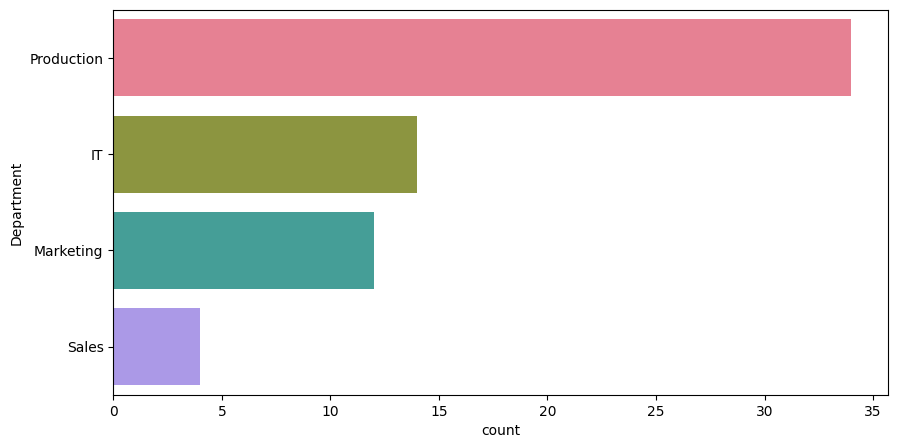

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df['Department'], palette='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/1223814154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Job Title'], palette ='husl')


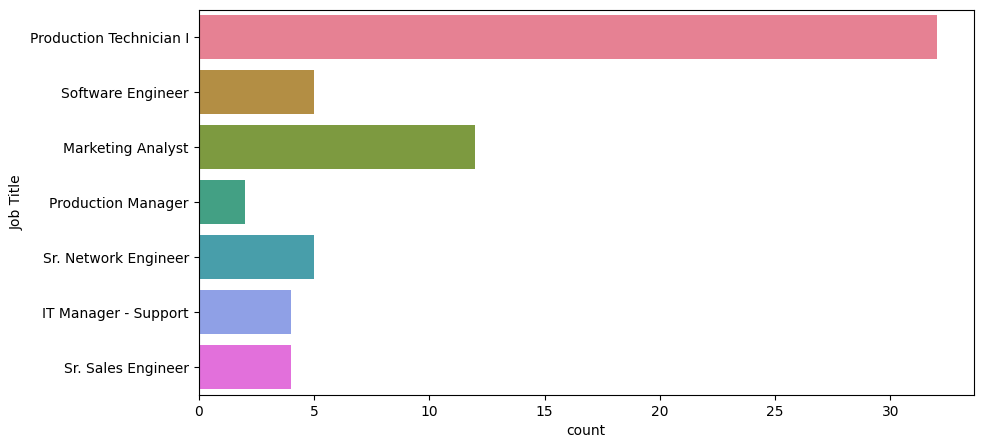

In [10]:
plt.figure(figsize =(10,5))
sns.countplot(df['Job Title'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/2058952572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Source of Hire'], palette ='husl')


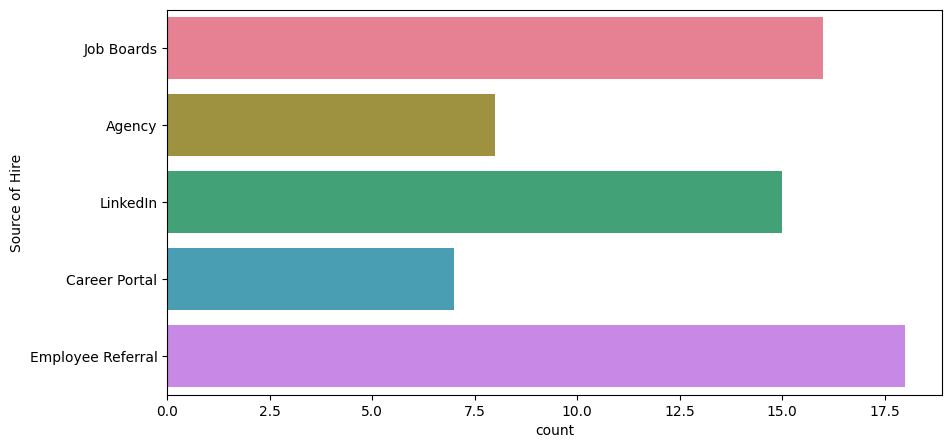

In [11]:
plt.figure(figsize =(10,5))
sns.countplot(df['Source of Hire'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/1052710344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Type of Hire'], palette ='husl')


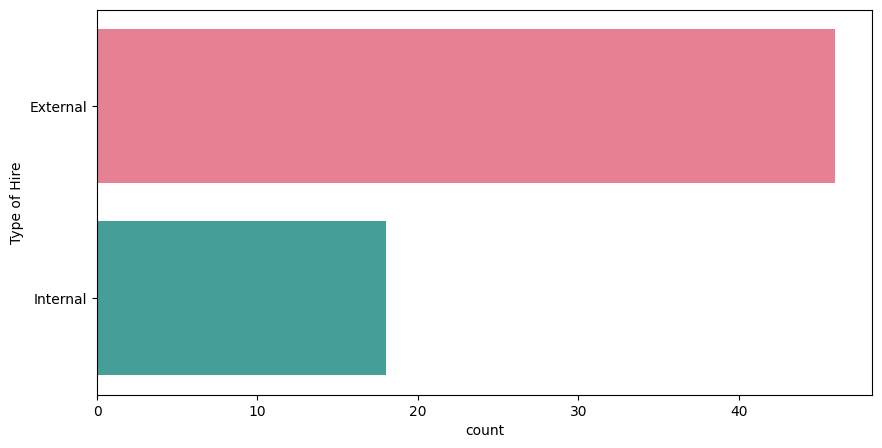

In [12]:
plt.figure(figsize =(10,5))
sns.countplot(df['Type of Hire'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/2560990152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sex'], palette ='husl')


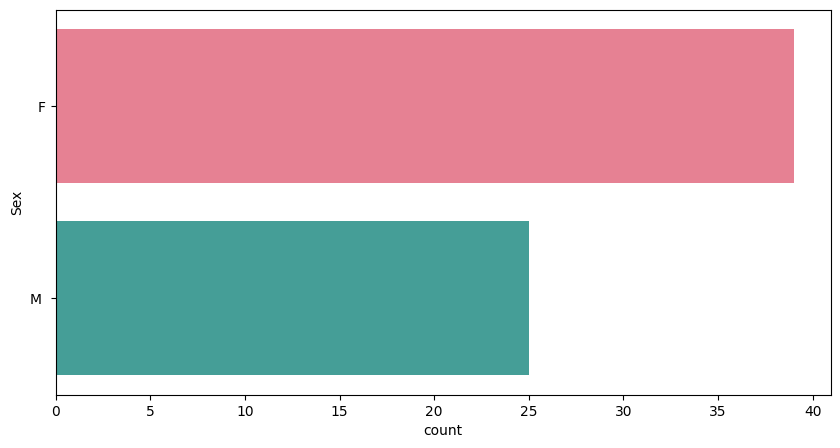

In [13]:
plt.figure(figsize =(10,5))
sns.countplot(df['Sex'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/1223814154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Job Title'], palette ='husl')


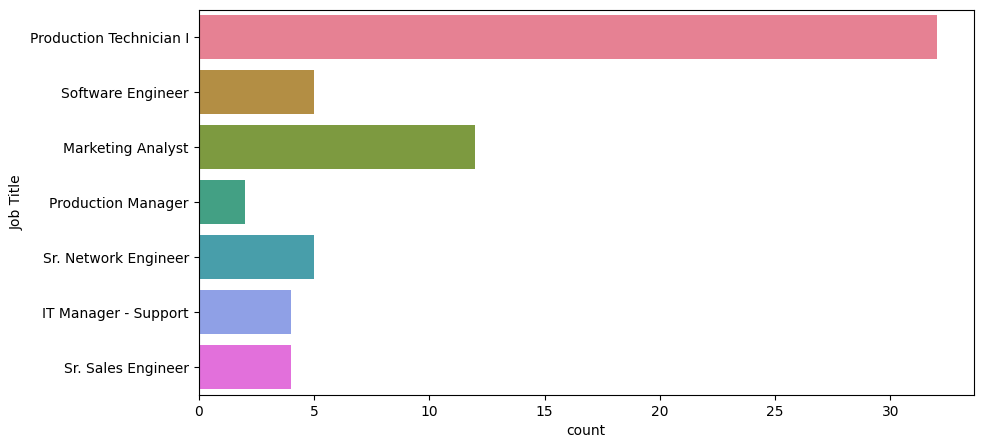

In [14]:
plt.figure(figsize =(10,5))
sns.countplot(df['Job Title'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/1668073487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['PerformanceScore'], palette ='husl')


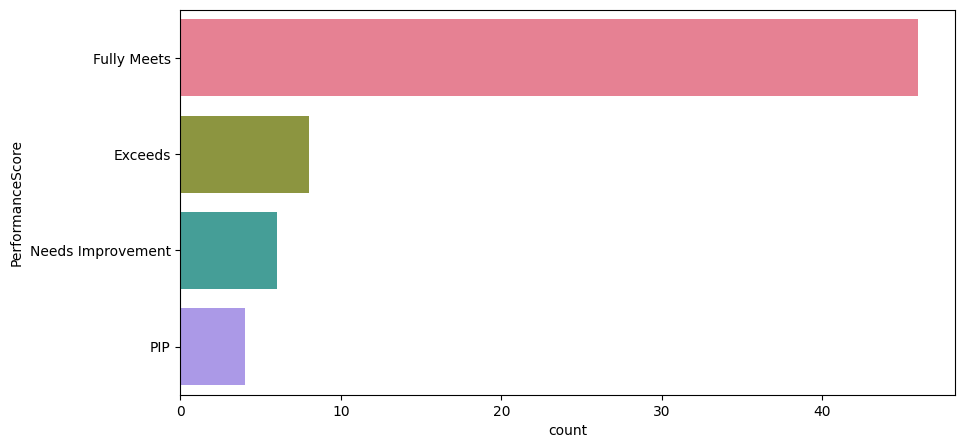

In [15]:
plt.figure(figsize =(10,5))
sns.countplot(df['PerformanceScore'], palette ='husl')
plt.show()

## Analyse Univarié Quantitatif

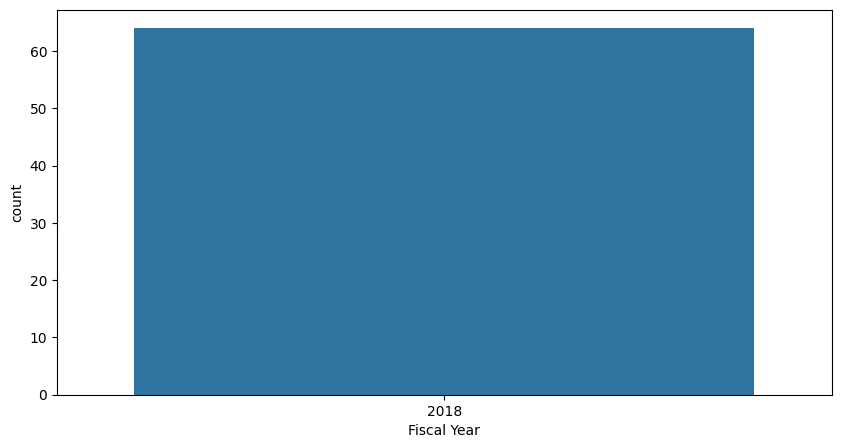

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(df['Fiscal Year'].value_counts())
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_928/615792069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Quarter'].value_counts(), palette = 'husl')


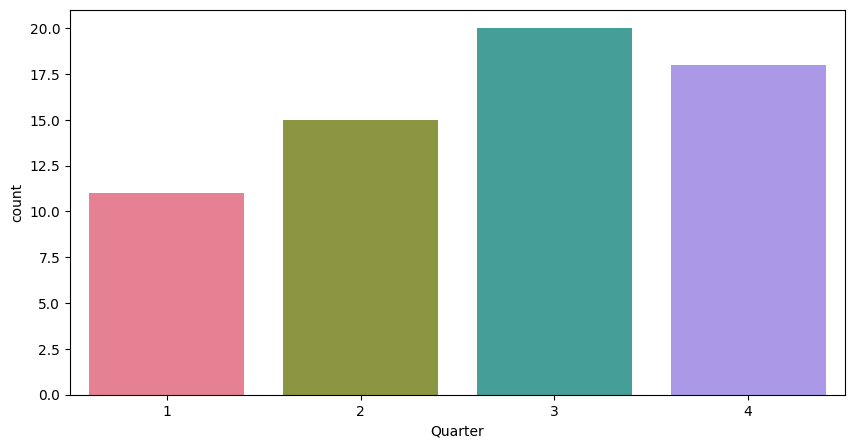

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(df['Quarter'].value_counts(), palette = 'husl')
plt.show()

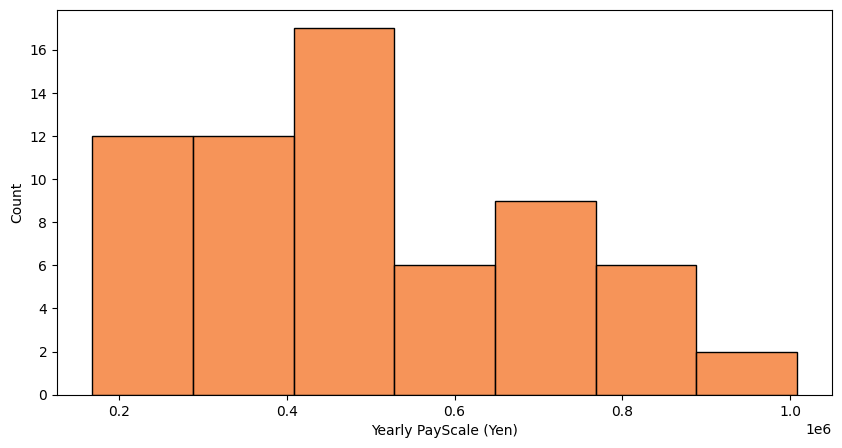

In [53]:
plt.figure(figsize = (10,5))
sns.histplot(df['Yearly PayScale (Yen)'], color = '#F37021')
plt.show()

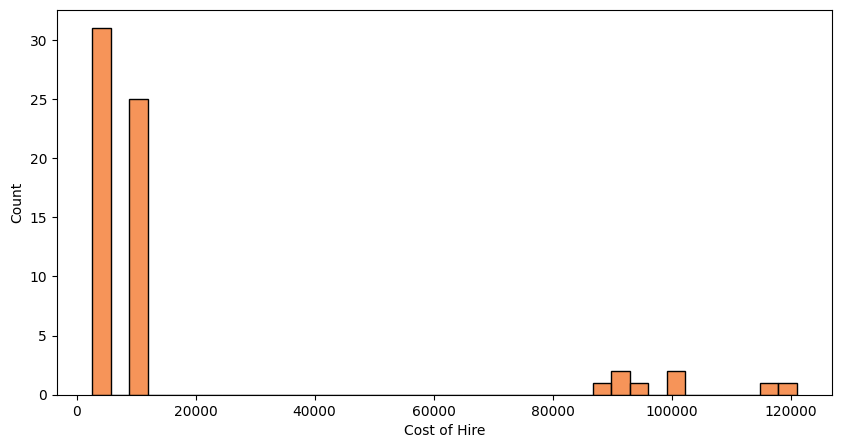

In [54]:
plt.figure(figsize = (10,5))
sns.histplot( df['Cost of Hire'], color ='#F37021')
plt.show()

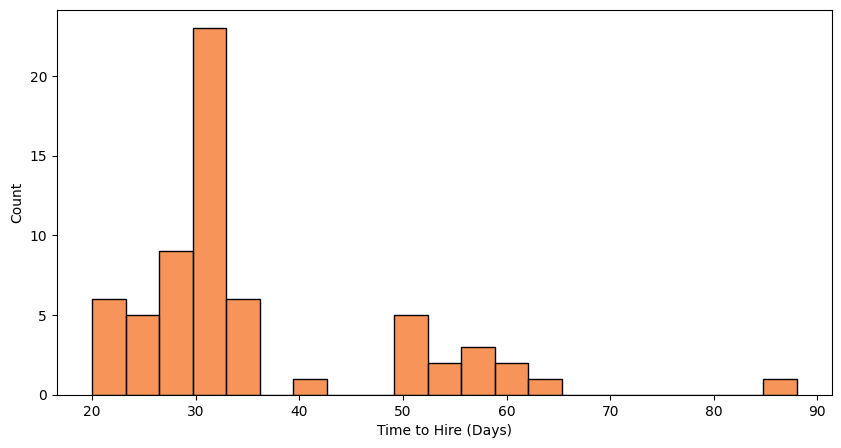

In [55]:
plt.figure(figsize = (10,5))
sns.histplot( df['Time to Hire (Days)'], color ='#F37021')
plt.show()

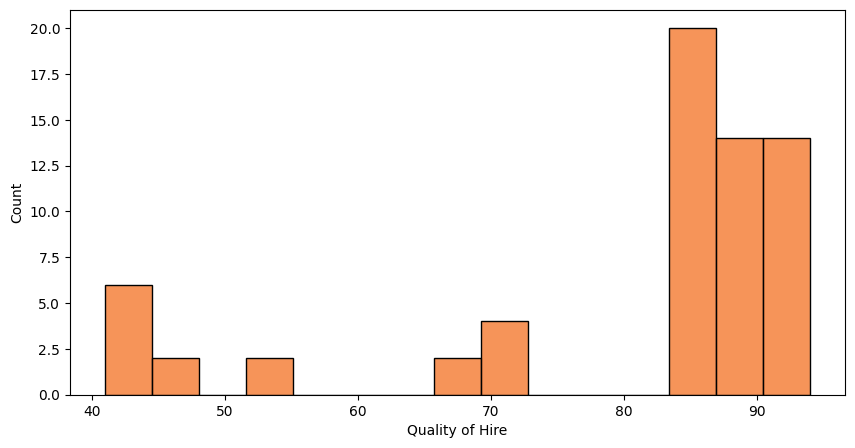

In [56]:
plt.figure(figsize = (10,5))
sns.histplot(df['Quality of Hire'], color ='#F37021')
plt.show()

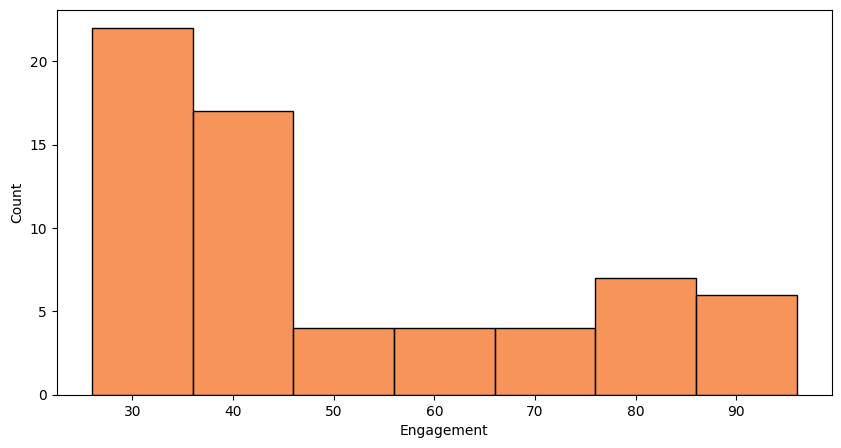

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(df['Engagement'], color='#F37021')
plt.show()

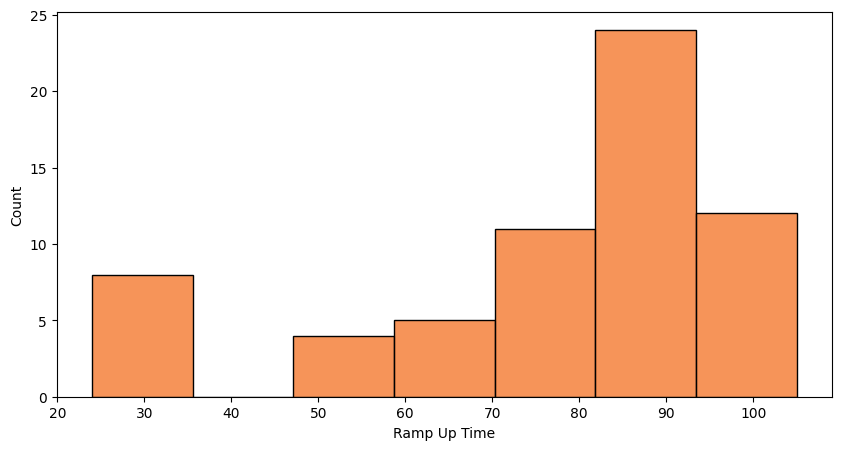

In [58]:
plt.figure(figsize = (10,5))
sns.histplot(df['Ramp Up Time'], color ='#F37021')
plt.show()

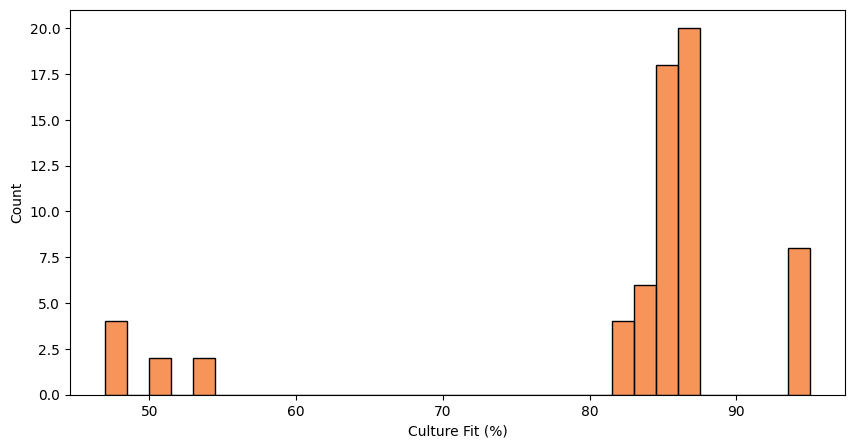

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(df['Culture Fit (%)'], color ='#F37021')
plt.show()

## c) Préparation des données (recodages, normalisations, etc.)

Suivre le cours (Independance et Selection de Variables)

## d) Définition et estimation du modèle explicatif et/oi prédictif à partir des données.

## e) Évaluation, diagnostic et vérification de la ualité du modèle et affinage.

## f) Intérpretaion, bilan et conclusion.